### Importación de datos



In [42]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [43]:
tienda.shape

(2359, 12)

#1. Análisis de facturación



##### En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [44]:
tiendas_colombia = [tienda, tienda2, tienda3, tienda4]

In [45]:
# Facturación total por cada tienda - manera 1:
facturacion_total = [ i['Precio'].sum() for i in tiendas_colombia]
facturacion_total

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

In [46]:
maximo = max(facturacion_total)
minimo = min(facturacion_total)

print(f'Tienda con mayor facturacion: {facturacion_total.index(maximo) + 1} ({maximo})')
print(f'Tienda con menor facturacion: {facturacion_total.index(minimo) + 1} ({minimo})')

Tienda con mayor facturacion: 1 (1150880400.0)
Tienda con menor facturacion: 4 (1038375700.0)


In [47]:
# Facturación total por cada tienda - manera 2(mas visual):
facturacion_total_2 = [
    f"Total tienda {i+1}: {df['Precio'].sum()}"
    for i, df in enumerate(tiendas_colombia)
]
facturacion_total_2

['Total tienda 1: 1150880400.0',
 'Total tienda 2: 1116343500.0',
 'Total tienda 3: 1098019600.0',
 'Total tienda 4: 1038375700.0']

# 2. Ventas por categoría

##### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [48]:
# Cantidad de productos vendidos por categoría en la tienda 1
tienda.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending=False)

,Precio
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [49]:
# Cantidad de productos vendidos por categoría en la tienda 2
tienda2.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending=False)

,Precio
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [50]:
# Cantidad de productos vendidos por categoría en la tienda 3
tienda3.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending=False)

,Precio
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [51]:
# Cantidad de productos vendidos por categoría en la tienda 4
tienda4.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending=False)

,Precio
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# 3. Calificación promedio de la tienda


##### En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos

In [52]:
# Promedio de calificación por cada tienda
promedios_calificacion = [ i['Calificación'].mean() for i in tiendas_colombia]
promedios_calificacion

[np.float64(3.976685036032217),
 np.float64(4.037303942348453),
 np.float64(4.048325561678677),
 np.float64(3.9957591178965224)]

In [53]:
prom_calificacion_max = max(promedios_calificacion)
prom_calificacion_min = min(promedios_calificacion)

print(f'La tienda {promedios_calificacion.index(prom_calificacion_max) + 1} tiene el mayor promedio de calificacion con: {round(prom_calificacion_max, 2)}')
print(f'La tienda {promedios_calificacion.index(prom_calificacion_min) + 1} tiene el menor promedio de calificacion con: {round(prom_calificacion_min, 2)}')

La tienda 3 tiene el mayor promedio de calificacion con: 4.05
La tienda 1 tiene el menor promedio de calificacion con: 3.98


# 4. Productos más y menos vendidos

##### En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [54]:
# Top 5 productos más vendidos de la tienda 1
tienda.groupby('Producto')[['Precio']].sum().sort_values('Precio', ascending=False).head()

,Precio
Producto,
TV LED UHD 4K,142150200.0
Refrigerador,112143300.0
Iphone 15,97902200.0
Smart TV,67452100.0
Lavadora de ropa,65783600.0


In [55]:
# Top 5 productos menos vendidos de la tienda 1
tienda.groupby('Producto')[['Precio']].sum().sort_values('Precio', ascending=True).head()

,Precio
Producto,
Cuerda para saltar,652800.0
Dinosaurio Rex,688900.0
Cubo mágico 8x8,696900.0
Set de vasos,1359100.0
Ajedrez de madera,1430600.0


In [56]:
# Productos más vendidos de las 4 tiendas (producto estrella)
mas_vendidos = [(i.groupby('Producto')['Precio'].sum().sort_values(ascending=False).index[0],
           i.groupby('Producto')['Precio'].sum().sort_values(ascending=False).iloc[0])
          for i in tiendas_colombia]

mas_vendidos

[('TV LED UHD 4K', np.float64(142150200.0)),
 ('Iphone 15', np.float64(113225800.0)),
 ('Refrigerador', np.float64(99889700.0)),
 ('Iphone 15', np.float64(96697500.0))]

In [57]:
# Productos menos vendidos de las 4 tiendas
menos_vendidos = [(i.groupby('Producto')['Precio'].sum().sort_values(ascending=True).index[0],
           i.groupby('Producto')['Precio'].sum().sort_values(ascending=True).iloc[0])
          for i in tiendas_colombia]

menos_vendidos

[('Cuerda para saltar', np.float64(652800.0)),
 ('Cubo mágico 8x8', np.float64(643600.0)),
 ('Cubo mágico 8x8', np.float64(640400.0)),
 ('Cuerda para saltar', np.float64(704800.0))]

# 5. Envío promedio por tienda

##### En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [58]:
# Costo de envio promedio por tienda
promedio_envio_tienda = [ i['Costo de envío'].mean() for i in tiendas_colombia]
promedio_envio_tienda

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

In [59]:
promedio_envio_maximo = max(promedio_envio_tienda)
promedio_envio_minimo = min(promedio_envio_tienda)

print(f'La tienda {promedio_envio_tienda.index(promedio_envio_maximo)+1} es la que tiene mayor promedio de costo de envio con: {round(promedio_envio_maximo,2)}')
print(f'La tienda {promedio_envio_tienda.index(promedio_envio_minimo)+1} es la que tiene menor promedio de costo de envio con: {round(promedio_envio_minimo,2)}')

La tienda 1 es la que tiene mayor promedio de costo de envio con: 26018.61
La tienda 4 es la que tiene menor promedio de costo de envio con: 23459.46


# 6. Generando graficos

## Graficos con Matplotlib

In [60]:
import matplotlib.pyplot as plt

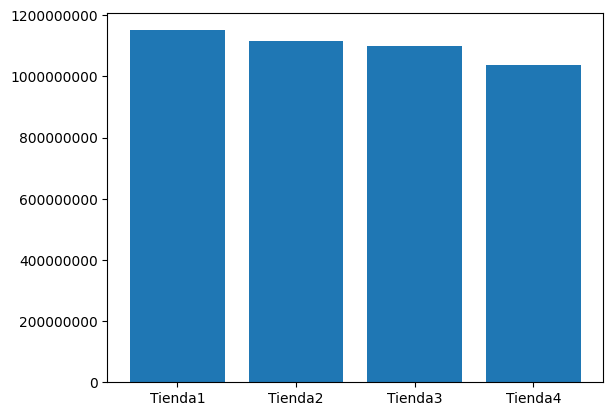

In [61]:
# Total de facturación por cada tienda
nombres_tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
plt.bar(nombres_tiendas, facturacion_total)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

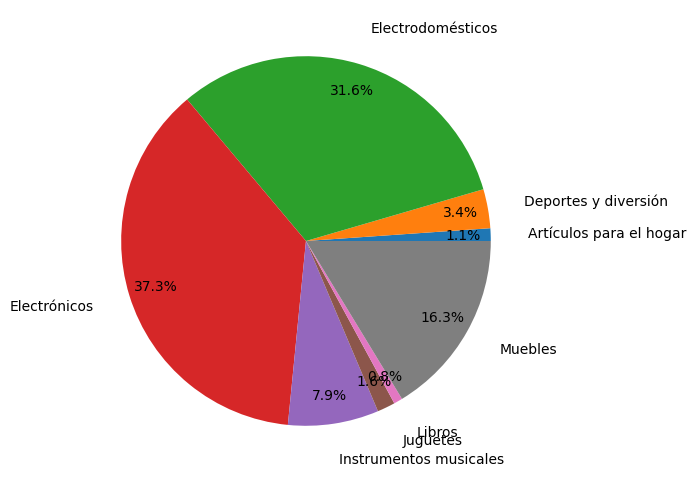

In [62]:
# Distribución en ventas de categorias por producto de la tienda 1
grafico_pastel = (tienda.groupby('Categoría del Producto')['Precio'].sum() / tienda['Precio'].count())
plt.figure(figsize=(18,6))
plt.pie(grafico_pastel, labels=grafico_pastel.index, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.2)
plt.show()

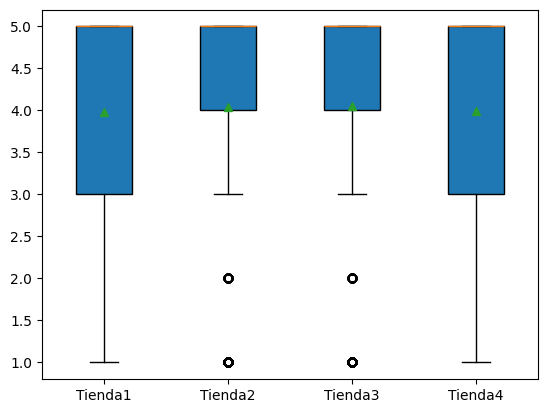

In [63]:
# Grafico de caja para las calificaciones por cada tienda
nombres_tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
calificaciones_completas = [ list(i['Calificación']) for i in tiendas_colombia]
plt.boxplot(calificaciones_completas, tick_labels=nombres_tiendas, patch_artist=True, showmeans=True)
plt.show()

## Graficos con Pandas

<Axes: ylabel='Categoría del Producto'>

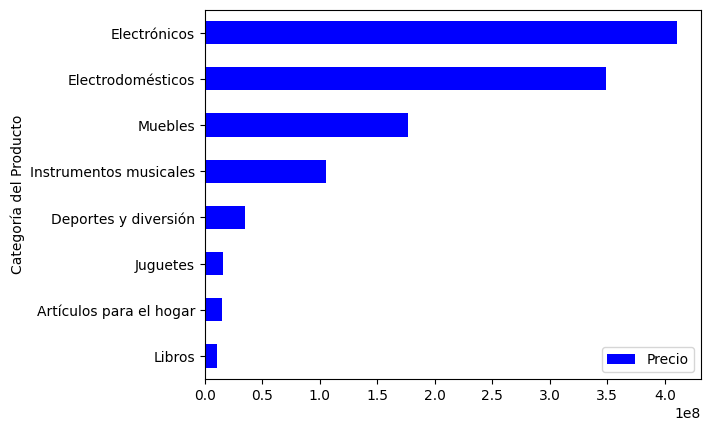

In [64]:
# Ventas por categoria de la tienda 2
categorias_tienda2 = tienda2.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio', ascending=True)
categorias_tienda2.plot(kind='barh', color='blue')

<Axes: ylabel='Categoría del Producto'>

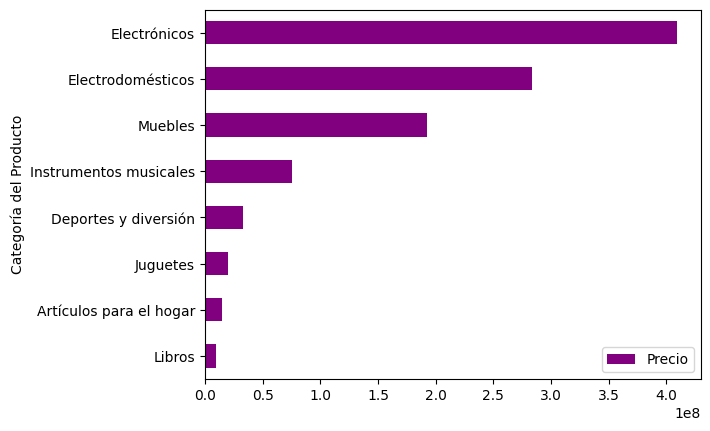

In [65]:
# Ventas por categoria de la tienda 4
categorias_tienda4 = tienda4.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio', ascending=True)
categorias_tienda4.plot(kind='barh', color='purple')

##### **Grafico de ventas a lo largo del tiempo:**
1. Para este grafico tenemos que unir todos los datasets y a cada uno agregarle una columna que tendra su respectivo nombre de tienda.

In [66]:
prueba_tienda = tienda.copy()
prueba_tienda2 = tienda2.copy()
prueba_tienda3 = tienda3.copy()
prueba_tienda4 = tienda4.copy()

In [67]:
prueba_tienda['Nombre de sucrusal'] = 'Tienda 1'
prueba_tienda2['Nombre de sucrusal'] = 'Tienda 2'
prueba_tienda3['Nombre de sucrusal'] = 'Tienda 3'
prueba_tienda4['Nombre de sucrusal'] = 'Tienda 4'

In [68]:
prueba_tienda['Fecha de Compra'] = pd.to_datetime(prueba_tienda['Fecha de Compra'], format='%d/%m/%Y')
prueba_tienda2['Fecha de Compra'] = pd.to_datetime(prueba_tienda2['Fecha de Compra'], format='%d/%m/%Y')
prueba_tienda3['Fecha de Compra'] = pd.to_datetime(prueba_tienda3['Fecha de Compra'], format='%d/%m/%Y')
prueba_tienda4['Fecha de Compra'] = pd.to_datetime(prueba_tienda4['Fecha de Compra'], format='%d/%m/%Y')

In [69]:
grafico_lineas_general = pd.concat([prueba_tienda, prueba_tienda2, prueba_tienda3, prueba_tienda4])

In [70]:
grafico_lineas_general.sort_values('Fecha de Compra', inplace=True)

In [71]:
ventas_por_fecha = grafico_lineas_general.groupby(['Fecha de Compra', 'Nombre de sucrusal'])[['Precio']].sum()

In [72]:
df_reset = ventas_por_fecha.reset_index()

In [73]:
df_ancho = df_reset.pivot(index='Fecha de Compra', columns='Nombre de sucrusal', values='Precio')

/tmp/ipython-input-3415066478.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.Grouper(key='Fecha de Compra', freq='Y'),


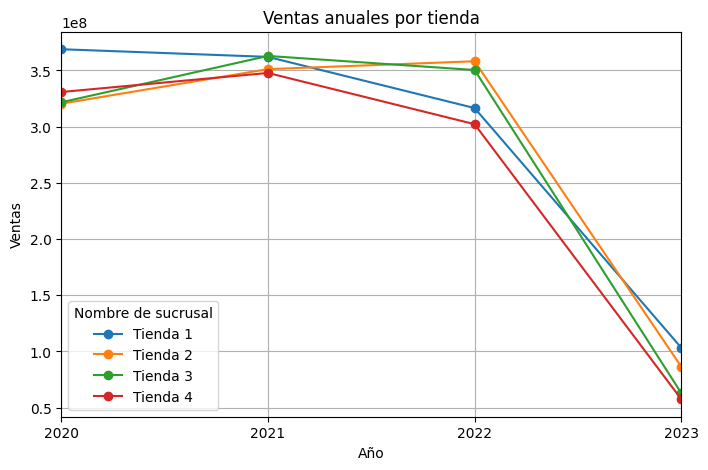

In [75]:
# Agrupar por año y tienda
ventas_anuales = grafico_lineas_general.groupby([
    pd.Grouper(key='Fecha de Compra', freq='Y'),
    'Nombre de sucrusal'
])['Precio'].sum().reset_index()

# Crear tabla pivote
df_anual = ventas_anuales.pivot(index='Fecha de Compra', columns='Nombre de sucrusal', values='Precio')

# Graficar
df_anual.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Ventas anuales por tienda')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


#7. Informe final

## 1. Introducción

- El objetivo de este análisis es ayudar al Sr. Juan a decidir cuál de las cuatro tiendas de la cadena debería venderse. Para tomar una decisión informada evaluamos varios indicadores clave como: **ingresos totales**, **calificación promedio de clientes**, **costo de envío promedio**, y **la evolución de ventas en el tiempo**. A partir de estos datos se compararon varios aspectos de las tiendas y se identificaron fortalezas y debilidades para recomendar la venta de la sucursal que represente menor valor estratégico o que sea menos eficiente.

## 2. Resumen de indicadores principales (por tienda)

- **Ingresos totales (COP):** Tienda 4 tiene los ingresos más bajos; Tienda 1 los más altos.
  - Tienda 1 = 1.150.880.400
  - Tienda 2 = 1.116.343.500
  - Tienda 3 = 1.098.019.600
  - Tienda 4 = 1.038.375.700

- **Calificación promedio (escala 1–5)**: Tienda 1 y Tienda 4 presentan las calificaciones promedio más bajas (Tienda 3 la más alta).
  - Tienda 1 = 3.98
  - Tienda 2 = 4.04
  - Tienda 3 = 4.05
  - Tienda 4 = 3.99

- **Costo de envío promedio (COP)**: Tienda 4 tiene el costo de envío promedio más bajo (lo cual es favorable para clientes), Tienda 1 el más alto.
  - Tienda 1 = 26.018
  - Tienda 2 = 25.216
  - Tienda 3 = 24.806
  - Tienda 4 = 23.459

- **Evolución de ventas (anual)**: El gráfico anual muestra que entre 2020–2022 las tiendas mantienen niveles similares; en 2023 hay una caída generalizada. Tienda 1 y 2 históricamente alcanzan mayores niveles absolutos, mientras Tienda 4 quedó consistentemente por debajo en ingresos totales.

## 3. Análisis y criterios para la decisión

- Para recomendar la venta consideramos, de forma conjunta, estos criterios:
  - **Volumen de negocio (ingresos)**: una tienda con ingresos bajos aporta menos flujo y podría ser la principal candidata a venderse si no hay expectativas claras de recuperación.

  - **Satisfacción del cliente (calificación)**: tiendas con calificaciones bajas pueden requerir inversión para mejorar reputación; si no se desea invertir, pueden ser candidatas a vender.

  - **Riesgos y facilidad de desinversión**: contratos de arrendamiento, costos fijos y estructura operativa (no cuantificados aquí) también deben considerarse.

- Al evaluar los indicadores cuantitativos que tenemos:
  - **Tienda 4**: peores ingresos (la más baja), calificación cercana a la media-baja, pero mejor costo de envío (ventaja competitiva en precio de entrega). Su posición sugiere menor cuota de mercado y menor capacidad de generación de caja frente a las demás.

  - **Tienda 1**: mayor facturación, pero calificación promedio ligeramente más baja y costos de envío más altos. Aunque su satisfacción es la más baja, sus ingresos y su posición histórica la hacen valiosa y venderla implicaría desprenderse del mayor generador de ingreso.

  - **Tiendas 2 y 3**: equilibrio más favorable (buenas calificaciones y niveles de ingresos intermedios).

## 4. Recomendación principal (qué tienda vender)

- **Recomendación: Vender la Tienda 4.**
  - Justificación concisa:
    - Es la tienda con menor facturación total, lo que indica menor aporte al flujo de caja y menor participación en ventas totales.

    - Su posición de ingresos la coloca en desventaja competitiva frente a las otras tres tiendas que generan más volumen.

    - Aunque tiene un costo de envío promedio más bajo (una ventaja para el cliente), esa ventaja no compensa su bajo volumen total: el negocio aporta menos que las otras sucursales y, por tanto, es la mejor candidata para liberar capital.

    - Vender Tienda 4 permite al Sr. Juan recuperar capital sin sacrificar la mayor parte del negocio (las tiendas 1–3 concentran la mayor parte de ingresos y clientes mejor valorados).

## 5. Alternativa / consideración adicional

- Si la prioridad del Sr. Juan fuera maximizar la satisfacción del cliente a corto plazo o reducir riesgos reputacionales, podría considerarse vender la Tienda 1 sólo en el caso de que su baja calificación y altos costos de envío supongan un problema estratégico mayor y exista evidencia de que su volumen provenga de factores no sostenibles (por ejemplo, acuerdos puntuales o ventas no repetibles). Sin embargo, vender Tienda 1 significa desprenderse de la mayor fuente de ingresos, por lo que no se recomienda salvo que su evaluación operacional (contratos, costos fijos, arrendamiento) haga la desinversión favorable.

## 7. Conclusión breve

  - Considerando ingresos, calificaciones y eficiencia, la Tienda 4 emerge como la candidata más adecuada para la venta: aporta la menor facturación y, pese a su ventaja en costos de envío, no compensa el menor volumen de negocio. Venderla permitiría al Sr. Juan liberar capital y concentrarse en las sucursales con mayor tracción (Tiendas 1–3).